In [1]:
import pandas as pd # data analysis and manipulation
import numpy as np # linear algebra
import glob # Glob moule searches all path names
import seaborn as sns
import matplotlib.pyplot as plt



# compile all data

In [195]:
# data into one dataframe 
result = glob.glob('results\*.csv')
df =[]
for i in range(len(result)):
    # Read the csv file into a dataframe
    df1 = pd.read_csv(result[i])

    # Add a new column 'res_id' to the dataframe
    df1['res_id'] = 1 + i
    # Append the dataframe to the list
    df.append(df1)
    
    
    
columns = df[0].columns
df = pd.DataFrame(np.vstack(df), columns =columns)
df.to_csv('final_result.csv', index=False)

## Preprocesses by Oversample vs. Accuracy Test

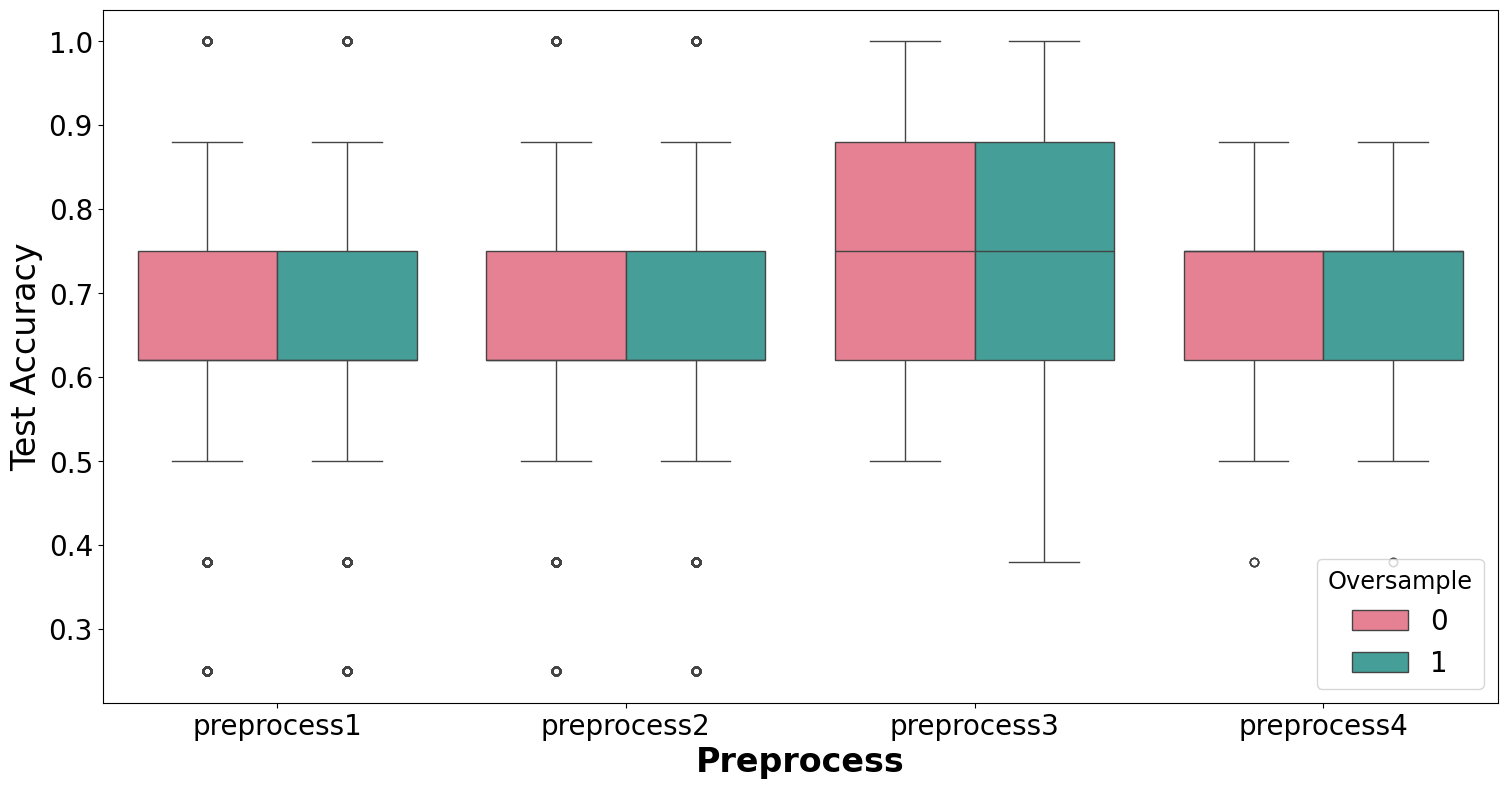

In [3]:
# groupby preprocess by accuracy test
plt.figure(figsize=(18,9))
sns.boxplot(data =df, x = "Preprocess", y= "accuracy_test", hue="Oversample",palette="husl")
plt.ylabel("Test Accuracy", fontsize =24)

plt.xlabel("Preprocess", fontsize = 24, weight ='bold')
plt.xticks(fontsize = 20)  # Rotate x-axis labels
plt.yticks(fontsize = 20)
plt.legend(loc="lower right", title_fontsize='xx-large', title = 'Oversample', fontsize =20)

plt.show()


In [22]:
df.groupby(['Preprocess','Oversample']).accuracy_test.mean()

Preprocess   Oversample
preprocess1  0             0.678255
             1             0.678257
preprocess2  0             0.675904
             1             0.676248
preprocess3  0             0.769685
             1             0.769575
preprocess4  0              0.71015
             1             0.711915
Name: accuracy_test, dtype: object

## Window setting vs. Accuracy Test

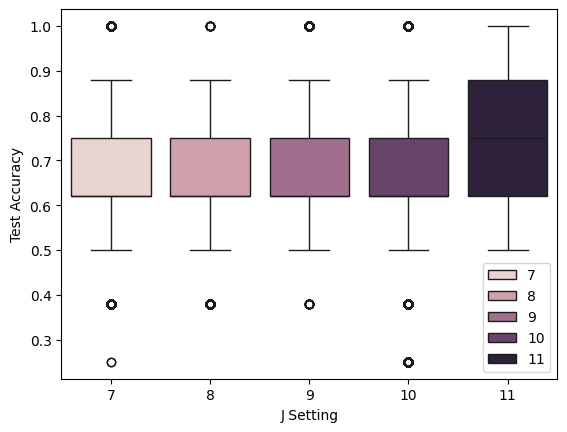

In [4]:
# groupby window setting by accuracy test
sns.boxplot(data =df, x = "J Setting", y= "accuracy_test", hue="J Setting")
plt.legend(loc="lower right")
plt.ylabel("Test Accuracy")
plt.show()

In [20]:
df.groupby(['J Setting']).accuracy_test.mean()

J Setting
7     0.664512
8      0.67416
9     0.686677
10    0.654943
11    0.734249
Name: accuracy_test, dtype: object

# Model vs. Accuracy Test

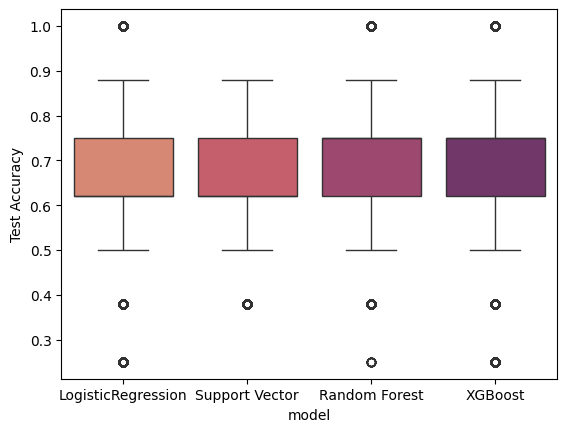

In [5]:
# groupby algorithm setting by accuracy test
sns.boxplot(data =df, x = "model", y= "accuracy_test", hue ='model', palette="flare", legend=False)
plt.ylabel("Test Accuracy")
plt.show()

## Preprocesses vs. Accuracy Test

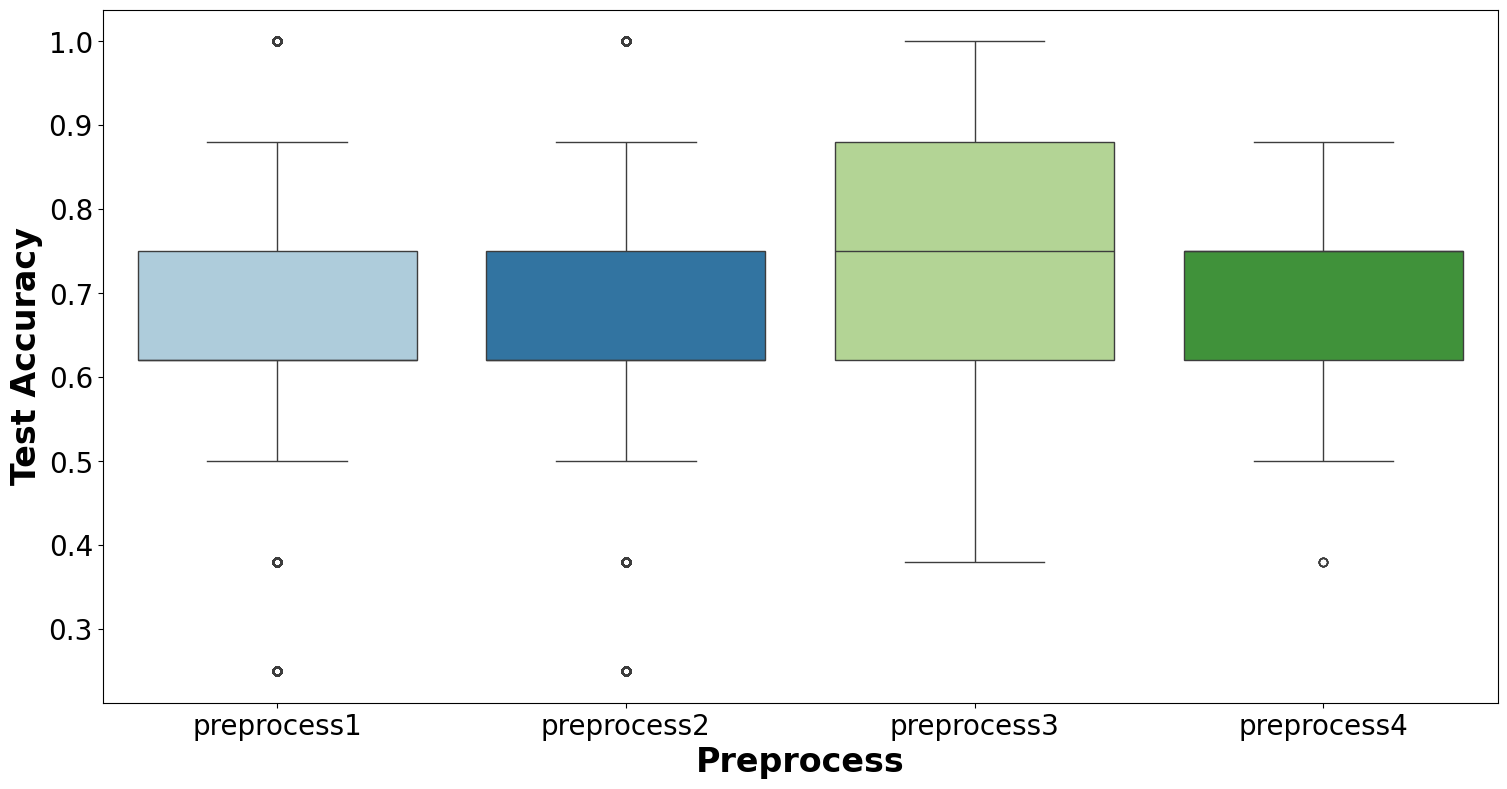

In [6]:
# groupby algorithm setting by accuracy test
plt.figure(figsize=(18,9))
sns.boxplot(data =df, x = "Preprocess", y= "accuracy_test", hue = "Preprocess", palette='Paired')

plt.ylabel("Test Accuracy")

plt.ylabel("Test Accuracy", fontsize = 24, weight ='bold')
plt.xlabel("Preprocess", fontsize = 24, weight ='bold')
plt.xticks(fontsize = 20)  # Rotate x-axis labels
plt.yticks(fontsize = 20)


plt.show()

In [ ]:
df.groupby(['J Setting']).accuracy_test.mean()

## Preprocesses by Wavelets vs. Accuracy Test

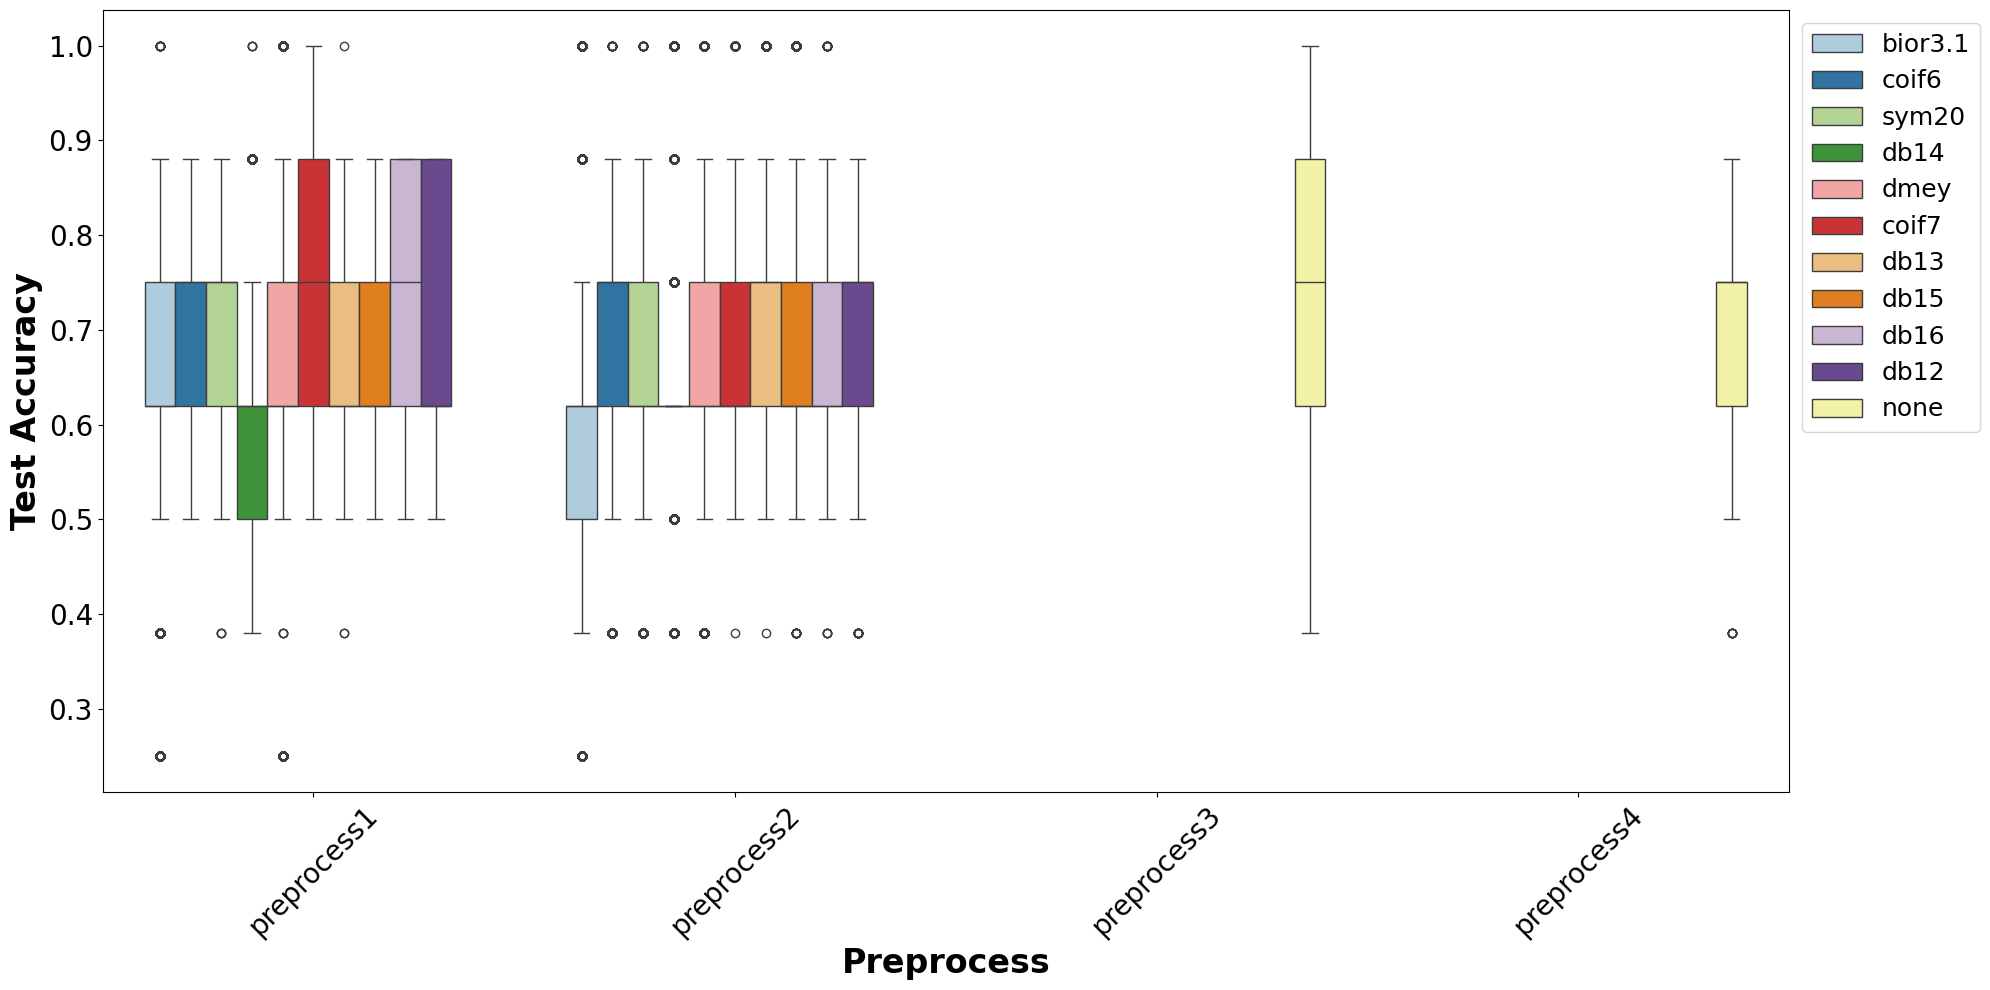

In [7]:
order = df.groupby('Preprocess')['wavelet'].nunique().sort_values(ascending=False).index
plt.figure(figsize=(20,10))
sns.boxplot(data=df, x="Preprocess", y="accuracy_test", hue="wavelet", 
            palette='Paired', order=order)

plt.ylabel("Test Accuracy", fontsize = 24, weight ='bold')
plt.xlabel("Preprocess", fontsize = 24, weight ='bold')
plt.xticks(rotation=45,  fontsize = 20)  # Rotate x-axis labels
plt.yticks(fontsize = 20)

plt.legend(fontsize = 18, bbox_to_anchor=(1, 1))
plt.tight_layout()  # Ensure labels fit within plot area
plt.show()